# Keras 란
* 파이썬으로 작성된 고수준 신경망 API 
* 사용자 친화성, 모듈성, 확장성을 통해 빠르게 프로토타이핑 가능
* 컨볼루션, 순환신경망, 둘 조합까지 모두 지원
* GPU, CPU에서 도구 실행 가능함


In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.4.0'

레이어들을 import 하는 방식(1)
* 일일이 import 하지 않아도 됨.
* 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras

keras.__version__

'2.4.0'

In [3]:
# 코드가 다소 길어짐
keras.layers.Dense(10, activation='sigmoid')

In [4]:
keras.Model()

In [5]:
keras.models.Sequential()

레이어들을 import 하는 방식(2)
* 일일이 import 해야함.
* 코드가 간결함

In [6]:
# 바로 접근해서 사용이 가능함, 코드가 간결해 짐
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [7]:
Dense(10, activation='relu')

In [8]:
Flatten(input_shape=(28, 28))

In [9]:
x_train = np.random.randn(5500, 2)
print(x_train.shape)
Input(shape=x_train.shape[1:])

(5500, 2)


<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

## 주요 레이어 
### Dense 

    * Fully_Connected Layer  
    * 노드수(유닛수), 활성화 함수 등을 지정  
    * name 를 통한 레이어간 구분 가능  
    * 기본적으로   
      'Xavier분포 초기화'=='Glorot_uniform' 가중치 초기화를 사용하고, zeros bias로 초기화 함.  
       kernal_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음.   

In [10]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [11]:
dense

In [12]:
dense2 = Dense(15, activation='softmax')

In [13]:
dense2

### Activation
    * Dense layer 에서 활성화 함수를 지정할 수도 있지만, 때에 따라서 따로 레이어를 만들어줄 수 있음
    * activation 만 동작하는 layer가 됨.

In [14]:
# 아래 방식으로 activation 레이어를 거치는 방식으로도 가능
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)

### Flatten 
    * 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
    
   > 예시)  
   (128, 3, 2, 2) --> (128, 12))

In [15]:
Flatten(input_shape=(28, 28))

### Input 
    * 모델에서 입력을 정의
    * shape, dtype을 포함
    * 하나의 모델은 여러개의 입력을 가질 수 있음 
    * summary() 메소드를 통해서는 보이지 않음 

In [16]:
input_1 = Input(shape=(28, 28), dtype=tf.float32)
input_2 = Input(shape=(8, ), dtype=tf.int32)
input_1, input_2

(<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>)

## 모델 구성 방법
* `Sequential()`  
* 서브클래싱(Subclassing)
* 함수형 API

### Sequential()

* 모델이 순차적으로 진행할 때 사용
* Sequential 객체 생성 후, add 를 통한 방법
* Sequential 인자에 한번에 추가
* 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [17]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
# 모델 시각화 가능
from tensorflow.keras.utils import plot_model

In [18]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인

* model 객체의 summary() 이용

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


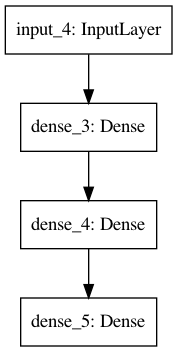

In [20]:
# 모델 저장도 가능 to_file
plot_model(model, to_file='model_img/model1.png')

In [21]:
# 인자에 한번에 추가도 가능함
model = Sequential([
    Input(shape=(28, 28), name='Input'), 
    Dense(300, activation='relu', name='Dense1'),
    Dense(100, activation='relu', name='Dense2'),
    Dense(10, activation='softmax', name='Output'),
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


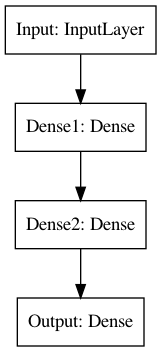

In [23]:
# 모델 저장도 가능 to_file
plot_model(model, to_file='model_img/model2.png')

### 함수형 API()

* 가장 권장되는 방법
* 모델을 복잡하고, 유연하게 구성이 가능
* 다중 입출력을 다룰 수 있음

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [25]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [26]:
# inputs = 입력 레이어, outputs = 마지막 출력 레이어
model = Model(inputs=inputs, outputs=x)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


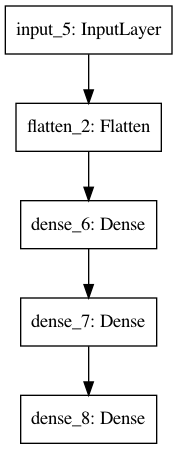

In [28]:
plot_model(model, to_file='model_img/model3.png')

In [29]:
from tensorflow.keras.layers import Concatenate

input_1 = Input(shape=(28, 28))
hidden1 = Dense(100, activation='relu')(input_1)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1)(concat)

model = Model(inputs=input_1, outputs=output)

In [30]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 100)      2900        input_6[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 30)       3030        dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_6[0][0]                    
                                                                 dense_10[0][0]             

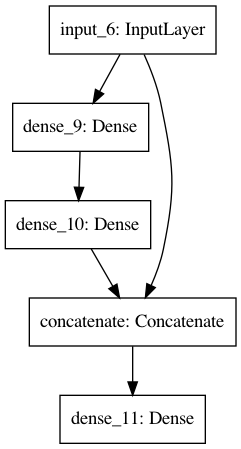

In [31]:
plot_model(model, to_file='model_img/model_concat.png')

In [32]:
# 다중 입력 레이어 
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

# concat 하려는 shape 이 맞아야 함.
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=output)

In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

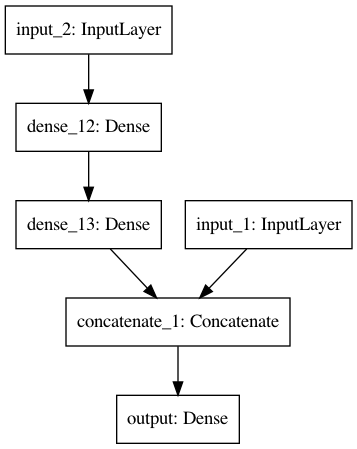

In [34]:
plot_model(model, to_file='model_img/model_multilayer.png')

In [35]:
# 다중 출력
input_ = Input(shape=(10, 10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs = [input_], outputs=[output, sub_out])

In [36]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_15[0][0]                   
____________________________________________________________________________________________

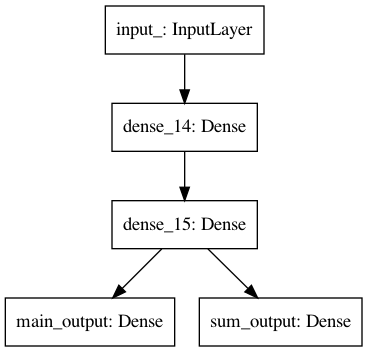

In [37]:
plot_model(model, to_file='model_img/model_multiout.png')

In [38]:
# 다중입력, 다중출력
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])

output = Dense(1, activation='sigmoid', name='main_ouput')(concat)
sub_out = Dense(1, name='sub_ouput')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [39]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
____________________________________________________________________________________________

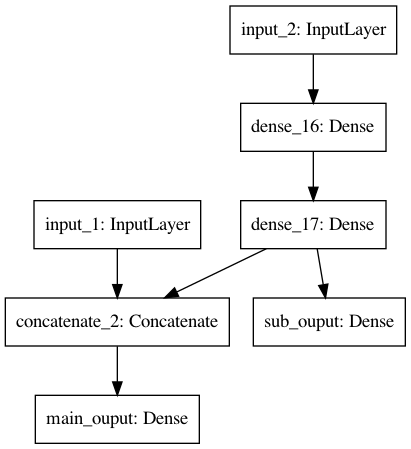

In [40]:
plot_model(model, to_file='model_img/model_multi_in_output.png')

### 서브클래싱 (Subclassing)

* 커스터마이징에 최적화된 방법  
* Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
`fit()`, `evalute()`, `predict()`, `save()`, `load()`
* 주로 `call()` 메소드 안에서 원하는 계산 가능  
`for`, `if`, 저수준 연산 등  
* 권장되는 방법은 아니지만, 어떤 모델의 구현 코드를 참고할 때 해석할 수 있어야 함.

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [42]:
class Mymodel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(Mymodel, self).__init__(*kwargs)
        
        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)
        
        self.output_layer = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2n(x)
        x = self.dense_layer3n(x)
        x = self.output_layer(x)
        return x 

## 모델 가중치 확인

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [44]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [45]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨

In [46]:
model.layers

In [47]:
hidden2 = model.layers[2]
hidden2.name

'dense_18'

위의 layer name 참고

In [48]:
# dense_18 라는 이름을 가진 레이어와 hidden2가 같은지
model.get_layer('dense_18') is hidden2

True

In [49]:
weights, biases = hidden2.get_weights()

In [50]:
weights

array([[ 0.00128818,  0.04220255, -0.0737092 , ...,  0.02364736,
         0.02760752,  0.06692368],
       [ 0.0192742 ,  0.06921534, -0.04934756, ..., -0.00476851,
         0.00236103, -0.06896447],
       [ 0.07109858, -0.07416146,  0.03175125, ...,  0.05612506,
        -0.05816189, -0.01872965],
       ...,
       [-0.05411113, -0.00453296,  0.02108956, ..., -0.04669863,
         0.05998643, -0.02560397],
       [-0.05184271,  0.02186989,  0.01396842, ...,  0.01623665,
         0.02300428,  0.0424568 ],
       [ 0.02095708,  0.01767013, -0.03990604, ...,  0.04427113,
        -0.04968318,  0.03109742]], dtype=float32)

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)
* 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이져(optimizer)를 지정이 가능함

In [53]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 참고
#### loss
* `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정가능  
    * `sparse_categorical_crossentropy` : 클래스가 배타적, (0,1,2,3,4,5)와 같은 방식으로 구분되어 있을 때 사용  
    * `categorical_cross_entropy` : 클래스가 원-핫 인코딩 방식으로 되어 있을때 사용  
    * `binary_crossentropy` : 이진 분류를 수행할 때 사용

### optimizer
* `keras.optimizer.SGD()` 등과 같이 사용 가능
    * 보통 옵티마이저의 **튜닝을 위해 따로 객체를 생성**하여 컴파일
    
    ```python
optimizer = keras.optimizer.SGD(learning_rate=1e-5)
model.compile(...,
              optimizer=optimizer,
              ...)
    ```
* `kerar.optimizer.Adam() 도 많이 사용

### metrics
* 모티너링할 지표
* 주로 'accuracy', 'acc'로 도 가능

### 참고2 - 컴파일 설정 예시
* 평균 제곱 오차, 회귀 문제 
    ```python
    model.compile(loss='mse,
                  optimizer=RMSprop(),
                  metrics=['mse'])
    ```
* 이진 분류
    ```python
    model.compile(loss='binary_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    ```
* 다항 분류
    ```python
    model.compile(loss='catrgorical_crossentropy,
                  optimizer=RMSprop()
                  metrics=['accuracy'])
    ```

## 모델 훈련, 평가 및 예측
* `fit()` 함수 
    * train_data(학습 데이터), train_label(데이터의 정답)
    * epochs
    * batch_size
    * validation_data
    * callback
    
* `evaluate()` 함수 : 테스트 데이터를 넣었을때 평가를 위한 함수
    * 테스트 데이터

* `predict()` 임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기 
* keras.datasets 에 포함되어 있는 데이터 셋

### modules import

In [54]:
import tensorflow as tf
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras import models
from keras.layers import Dense, Input, Flatten
from keras.utils import to_categorical
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 셋 로드
* MNIST 데이터셋을 로드
* train data 중, 30% 를 검증 데이터(valiation data)로 사용

In [55]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111, shuffle=False)

3


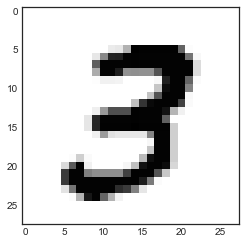

In [56]:
idx = 7
print(y_train[idx])
plt.imshow(x_train[idx])
plt.show()

### 데이터 확인

In [57]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])
print(num_x_train, num_x_val, num_x_test)

42000 18000 10000


In [58]:
print("전체 데이터 : {}\t레이블 : {}\n".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t레이블 : {}\n".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape, y_test.shape))

전체 데이터 : (60000, 28, 28)	레이블 : (60000,)

학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)

테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)


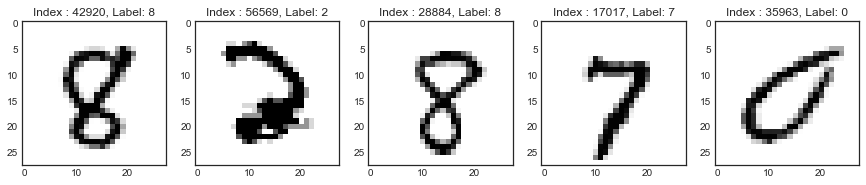

In [59]:
num_sample = 5
random_idx = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_idx):
    img = x_train_full[idx, :, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idx), i+1)
    plt.imshow(img)
    plt.title('Index : {}, Label: {}'.format(idx, label))
    plt.show

### 데이터 전처리
* Normalization  
흑잭 이미지 gray_scale의 경우에는 색상이 하나 이면서 0 ~ 255의 값을 가지게 됨. 그런데 이를 255로 나누게 되면 모든 값이 0 ~ 1 사이의 값을 갖게 됨. 

In [60]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [61]:
# to_categorical : 원-핫 벡터 형식으로 변환해줌
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성(Sequential)

In [62]:
model_mnist = Sequential([
    Input(shape=(28, 28), name='input'), 
    Flatten(input_shape=[28, 28], name='flatten'), 
    Dense(100, activation='relu', name='dense1'),
    Dense(64, activation='relu', name='dense2'),
    Dense(32, activation='relu', name='dense3'),
    Dense(10, activation='softmax', name='output')
])

In [63]:
model_mnist.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


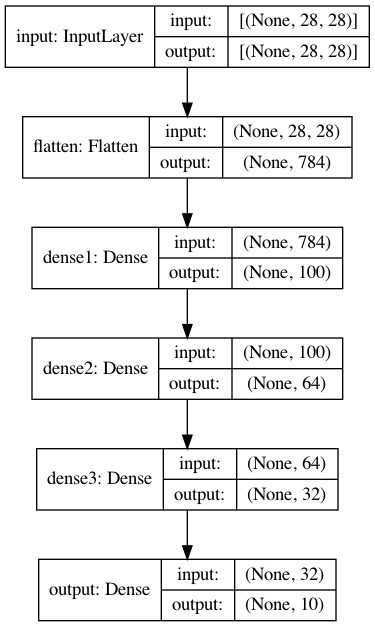

In [64]:
# show_shapes 인잣값으로 레이어 마다 shape 확인이 가능
plot_model(model_mnist, show_shapes=True, to_file='model_img/model_mnist.png')

### 모델 컴파일

In [65]:
model_mnist.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

### 모델 학습
* 모델 시각화를 위해 history 라는 변수에 넣어줌

In [66]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss',
                              patience=10,
                              mode='min')

history = model_mnist.fit(x_train,
                          y_train,
                          epochs=60,
                          batch_size=128,
                          validation_data=(x_val, y_val),
                          callbacks=[early_stopping])

Epoch 1/60
329/329 [==============================] - 2s 3ms/step - loss: 0.8085 - accuracy: 0.7638 - val_loss: 0.2016 - val_accuracy: 0.9419
Epoch 2/60
329/329 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9496 - val_loss: 0.1506 - val_accuracy: 0.9556
Epoch 3/60
329/329 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9625 - val_loss: 0.1319 - val_accuracy: 0.9619
Epoch 4/60
329/329 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9740 - val_loss: 0.1171 - val_accuracy: 0.9666
Epoch 5/60
329/329 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.1206 - val_accuracy: 0.9661
Epoch 6/60
329/329 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.1162 - val_accuracy: 0.9654
Epoch 7/60
329/329 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.1114 - val_accuracy: 0.9683
Epoch 

### 학습 결과 시각화
history 에 dict 형태로 저장이됨. loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.1745 - val_accuracy: 0.9717


In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

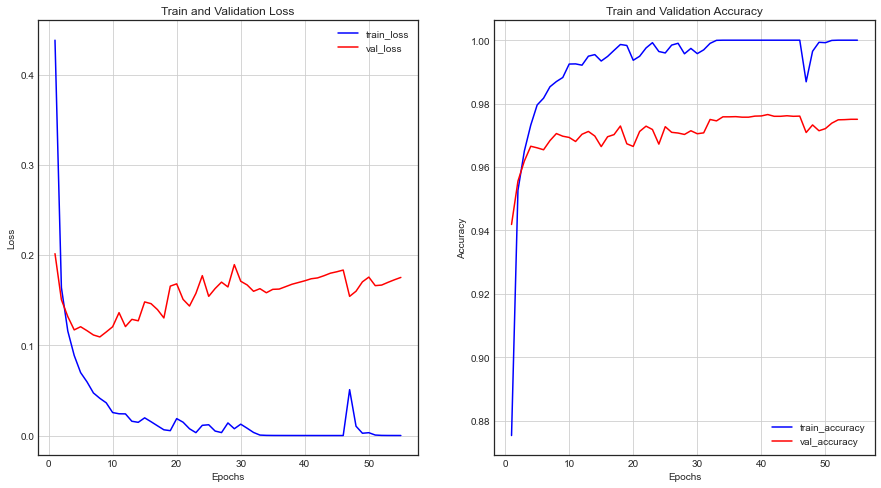

In [68]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가(1)
* `evalute()`

In [69]:
model_mnist.evaluate(x_test, y_test)

313/313 [==============================] - 0s 761us/step - loss: 0.1236 - accuracy: 0.9792


[0.12359654903411865, 0.979200005531311]

#### 학습된 모델을 통해 값 예측

In [70]:
pred_ys = model_mnist.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)

# 첫번째 있는 클래스가 각 클래스에 속할 확률 : 10개의 클래스 들의 확률값
print(pred_ys[0])

(10000, 10)
[2.1940202e-16 1.2095069e-14 4.7267125e-12 1.0773991e-09 1.3126349e-17
 5.7393195e-16 2.7295505e-19 1.0000000e+00 1.8314140e-13 1.1073379e-12]


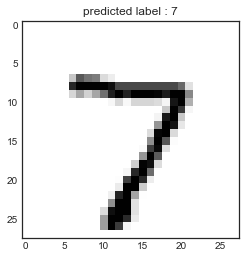

In [71]:
arg_pred_y = np.argmax(pred_ys, axis=1)

idx = 0

plt.imshow(x_test[idx])
plt.title('predicted label : {}'.format(arg_pred_y[idx]))
plt.show()

### 모델 평가 (2)
* 혼동 행렬(Confusion Matrix))

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

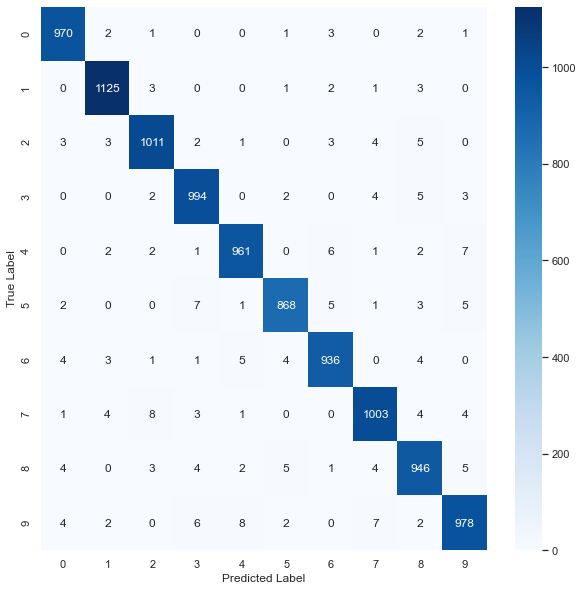

In [73]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
* 분류 보고서

In [74]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [75]:
model_mnist.save('model/mnist_model.h5')

In [76]:
loaded_model = models.load_model('model/mnist_model.h5')

In [77]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [78]:
pred_ys = loaded_model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(7)
print(pred_ys[0])

(10000, 10)
[2.1940202e-16 1.2095069e-14 4.7267125e-12 1.0773991e-09 1.3126349e-17
 5.7393195e-16 2.7295505e-19 1.0000000e+00 1.8314140e-13 1.1073379e-12]


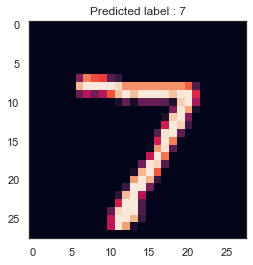

In [79]:
arg_pred_y2 = np.argmax(pred_ys, axis=-1)

plt.imshow(x_test[0])
plt.title('Predicted label : {}'.format(arg_pred_y2[0]))
plt.show()

## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [80]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

print("전체 데이터 : {}\t레이블 : {}\n".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t레이블 : {}\n".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape, y_test.shape))

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# to_categorical : 원-핫 벡터 형식으로 변환해줌
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential([
    Input(shape=(28, 28), name='input'), 
    Flatten(input_shape=[28, 28], name='flatten'), 
    Dense(100, activation='relu', name='dense1'),
    Dense(64, activation='relu', name='dense2'),
    Dense(32, activation='relu', name='dense3'),
    Dense(10, activation='softmax', name='output')])
    
    model.compile(optimizer='sgd',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = build_model()

model.summary()

전체 데이터 : (60000, 28, 28)	레이블 : (60000,)

학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)

테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
___________________

In [81]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

### ModelCheckpoint

In [82]:
check_point_cb = ModelCheckpoint('model/cb_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 1s 795us/step - loss: 1.4277 - accuracy: 0.5610
Epoch 2/10
1313/1313 [==============================] - 1s 774us/step - loss: 0.3584 - accuracy: 0.8994
Epoch 3/10
1313/1313 [==============================] - 1s 805us/step - loss: 0.2672 - accuracy: 0.9227
Epoch 4/10
1313/1313 [==============================] - 1s 790us/step - loss: 0.2276 - accuracy: 0.9347
Epoch 5/10
1313/1313 [==============================] - 1s 831us/step - loss: 0.1987 - accuracy: 0.9430
Epoch 6/10
1313/1313 [==============================] - 1s 794us/step - loss: 0.1742 - accuracy: 0.9487
Epoch 7/10
1313/1313 [==============================] - 1s 814us/step - loss: 0.1565 - accuracy: 0.9548
Epoch 8/10
1313/1313 [==============================] - 1s 784us/step - loss: 0.1382 - accuracy: 0.9615
Epoch 9/10
1313/1313 [==============================] - 1s 802us/step - loss: 0.1205 - accuracy: 0.9659
Epoch 10/10
1313/1313 [==============================] - 1s 760u

In [83]:
 history.history.keys()

dict_keys(['loss', 'accuracy'])

In [84]:
loaded_model = load_model('model/cb_mnist_model.h5')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


최상의 모델만을 저장  
* save_best_only=True

In [85]:
mode = build_model()
cp = ModelCheckpoint('model/keras_best_model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10, callbacks=[cp], validation_data=(x_val, y_val))

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1038 - accuracy: 0.9695 - val_loss: 0.1306 - val_accuracy: 0.9598
Epoch 2/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9721 - val_loss: 0.1269 - val_accuracy: 0.9612
Epoch 3/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0881 - accuracy: 0.9738 - val_loss: 0.1229 - val_accuracy: 0.9623
Epoch 4/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0818 - accuracy: 0.9757 - val_loss: 0.1253 - val_accuracy: 0.9625
Epoch 5/10
1313/1313 [==============================] - 1s 984us/step - loss: 0.0755 - accuracy: 0.9780 - val_loss: 0.1165 - val_accuracy: 0.9656
Epoch 6/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.1160 - val_accuracy: 0.9647
Epoch 7/10
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0655 - accuracy: 0.9810 - val_loss: 0.1117 - val_accurac

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [87]:
load_model2 = load_model('model/keras_best_model.h5')
load_model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [88]:
model = build_model()

cp = ModelCheckpoint('model/keras_best_model2.h5', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[cp, es])

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 1.3836 - accuracy: 0.5950 - val_loss: 0.3828 - val_accuracy: 0.8844
Epoch 2/50
1313/1313 [==============================] - 1s 996us/step - loss: 0.3576 - accuracy: 0.8961 - val_loss: 0.3154 - val_accuracy: 0.9045
Epoch 3/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2738 - accuracy: 0.9207 - val_loss: 0.2475 - val_accuracy: 0.9251
Epoch 4/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2301 - accuracy: 0.9324 - val_loss: 0.2200 - val_accuracy: 0.9337
Epoch 5/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2020 - accuracy: 0.9425 - val_loss: 0.1957 - val_accuracy: 0.9417
Epoch 6/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1728 - accuracy: 0.9500 - val_loss: 0.1832 - val_accuracy: 0.9446
Epoch 7/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1562 - accuracy: 0.9550 - val_loss: 0.1836 - val_accurac

### LearningRateScheduler

In [89]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [92]:
model = build_model()

round(model.optimizer.lr.numpy(), 5)

0.01

In [95]:
lr_scheduler_cb = LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15, callbacks=[lr_scheduler_cb], verbose=0)
round(model.optimizer.lr.numpy(), 5)

0.00223

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [96]:
TensorBoard(log_dir='.logs', histogram_freq=0, write_graph=True, write_images=True)

In [97]:
log_dir='./logs'

tendor_board_db = [TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)]

model = build_model()

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=30, callbacks=[tendor_board_db])

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 1.4535 - accuracy: 0.5405 - val_loss: 0.3613 - val_accuracy: 0.8942
Epoch 2/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3446 - accuracy: 0.9012 - val_loss: 0.2893 - val_accuracy: 0.9136
Epoch 3/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2654 - accuracy: 0.9236 - val_loss: 0.2394 - val_accuracy: 0.9283
Epoch 4/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.9336 - val_loss: 0.2210 - val_accuracy: 0.9347
Epoch 5/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2051 - accuracy: 0.9413 - val_loss: 0.2018 - val_accuracy: 0.9402
Epoch 6/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1807 - accuracy: 0.9472 - val_loss: 0.1910 - val_accuracy: 0.9445
Epoch 7/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1644 - accuracy: 0.9505 - val_loss: 0.1704 - val_accuracy:

In [98]:
%load_ext tensorboard

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000

In [99]:
%tensorboard --logdir {log_dir}